In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
import numpy as np
from torchsummary import summary

In [5]:
path = '/content/drive/MyDrive/images/lfw_funneled'

In [ ]:

images = []
names = []
dirs = []
paths = []
for dir_name in tqdm(listdir(path)):
  abs_path = path +'/' + dir_name
 # print(abs_path)
  try:
    for image_name  in listdir(abs_path):
      #image = read_image(abs_path + '/' + image_name)
      #print(image)
      # Read the image
      #image = cv2.imread(abs_path + '/' + image_name)
      paths.append(abs_path + '/' + image_name)
      names.append(image_name)
      dirs.append(dir_name)
  except:
    print('Error: ',abs_path)







 91%|█████████ | 5235/5760 [03:00<00:00, 1684.33it/s]

Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_02.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_05.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_07.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_04.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_09.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_06.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_01.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_03.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_08.txt
Error:  /content/drive/MyDrive/images/lfw_funneled/pairs_10.txt


100%|██████████| 5760/5760 [03:01<00:00, 31.77it/s]  


In [ ]:
#df_dict = {'name':names,'path':paths,'dir':dirs}
#pd.DataFrame(df_dict).to_csv('/content/drive/MyDrive/images/data.csv')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/images/data.csv')

In [7]:


class FacesDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths,labels):

        self.image_paths = image_paths
        self.labels=labels


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.normalize(image, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        # crop image
        image = image[60:-60,60:-60]
        image = cv2.resize(image,(128,128))
        #image = np.transpose(image, (0, 3, 1, 2))
        label = self.labels[idx]
        return {"image": torch.tensor(image), "label": label}

In [ ]:
df.head()

,Unnamed: 0,name,path,dir
0,0,Rodney_Dangerfield_0001.jpg,/content/drive/MyDrive/images/lfw_funneled/Rod...,Rodney_Dangerfield
1,1,Roel_Campos_0001.jpg,/content/drive/MyDrive/images/lfw_funneled/Roe...,Roel_Campos
2,2,Rod_Stewart_0002.jpg,/content/drive/MyDrive/images/lfw_funneled/Rod...,Rod_Stewart
3,3,Rod_Stewart_0001.jpg,/content/drive/MyDrive/images/lfw_funneled/Rod...,Rod_Stewart
4,4,Rod_Stewart_0003.jpg,/content/drive/MyDrive/images/lfw_funneled/Rod...,Rod_Stewart


In [8]:
fd = FacesDataset(df.path.values,df.dir.values)

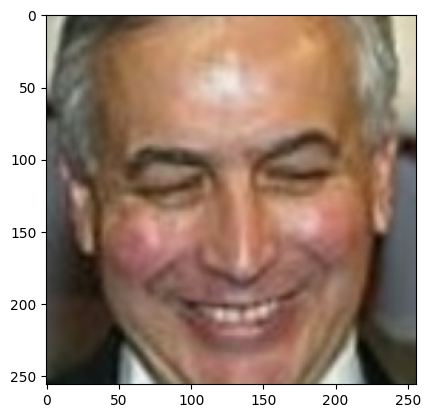

In [ ]:
plt.imshow(fd[1]['image'])

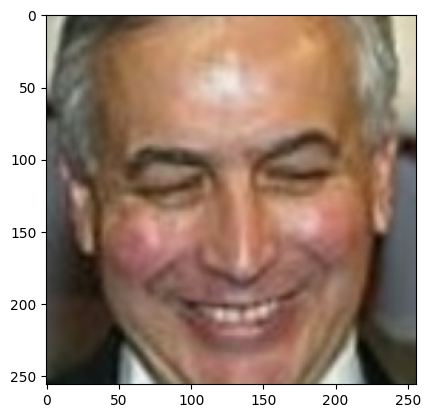

In [ ]:
plt.imshow(fd[1]['image'])

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self,latent_dim):
        super(Autoencoder, self).__init__()

        self.linear_decoder =  nn.Linear(latent_dim, 32*16*16)

        self.encoder = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size=3, padding=1), # (128,128)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.MaxPool2d(kernel_size=2, stride=2)
            #nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3,stride = 2, padding=1),  #   (64,64)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2),

            #nn.Conv2d(32, 64, kernel_size=3, padding=1),  #   (64,64)
            #nn.BatchNorm2d(64),
            #nn.ReLU(),


            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1), #(32,32)
            nn.BatchNorm2d(128),
            nn.ReLU(),

            #nn.Conv2d(64, 32, kernel_size=3,padding=1,stride = 2), #(32,32)
            #nn.BatchNorm2d(32),
            #nn.ReLU(),

           # nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1), #(32,32)
           # nn.BatchNorm2d(128),
           # nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3,  padding=1,stride = 2), #(32,32)
            nn.BatchNorm2d(256),
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1),
            #nn.BatchNorm2d(128),
            #nn.ReLU(),

            nn.Conv2d(256, 32, kernel_size=3,  padding=1), #(16,16)
            nn.BatchNorm2d(32),
            nn.ReLU(),

            #nn.Conv2d(32, 8, kernel_size=3,  padding=1,stride=2), #(16,16)
            #nn.BatchNorm2d(8),
            #nn.ReLU(),


            #nn.Conv2d(64, 16, kernel_size=3,  padding=1), #(8,8)
            #nn.BatchNorm2d(16),
            #nn.ReLU(),

            #nn.Conv2d(16, 8, kernel_size=3,  padding=1), #(8,8)
            #nn.BatchNorm2d(8),
            #nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2)
            nn.Flatten(),
            nn.Linear(32*16*16,latent_dim)
        )
        self.decoder = nn.Sequential(
           # chiamare lianear_decode
            # effettuare un reshape
            nn.ConvTranspose2d(32, 256, kernel_size=3,stride=1,padding=1),# (16,32,32)
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.ConvTranspose2d(256, 128,kernel_size=3,stride=2, padding=1,output_padding=1),# (16,64,64)
            nn.BatchNorm2d(128),
            nn.ReLU(),

            #nn.ConvTranspose2d(64, 64, kernel_size=3,stride=1,padding=1),
            #nn.BatchNorm2d(64),
            #nn.ReLU(),

            #nn.ConvTranspose2d(64, 64,kernel_size=3,padding=1),
            #nn.BatchNorm2d(64),
            #nn.ReLU(),

            nn.ConvTranspose2d(128, 64,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.ConvTranspose2d(64,32 ,kernel_size=3,stride=2,padding=1,output_padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.ConvTranspose2d(32, 3,kernel_size=3,padding=1),
            nn.BatchNorm2d(3),
            nn.Sigmoid(),

            #nn.ConvTranspose2d(16, 3,kernel_size=3,stride=2,padding=1,output_padding=1),
            #nn.BatchNorm2d(3),
            #nn.ReLU(),
            #nn.Sigmoid()
        )

    def encode(self,x):
       x = x.view(-1, 3, 128, 128)# reshape (3,128,128)
       x = self.encoder(x)
       return x

    def forward(self, x):
      # l'input è di (128,128,3)
        x = x.view(-1, 3, 128, 128)# reshape (3,128,128)
        x = self.encoder(x)
        x = self.linear_decoder(x)
        x = x.view(-1, 32,16, 16) # reshape (32,32,32)
        x = self.decoder(x)
        return x


In [10]:

def create_dataloader(X,y,batch_size,shuffle=True):
   custom_dataset = FacesDataset(X,y)

   data_loader = DataLoader(custom_dataset,
                                  batch_size=batch_size,
                                  shuffle=shuffle)
   return data_loader

In [ ]:
example = np.array([fd[0]['image']])

In [ ]:
example.shape

(1, 128, 128, 3)

In [ ]:
torch.tensor(example).view(-1,3,128,128).shape

torch.Size([1, 3, 128, 128])

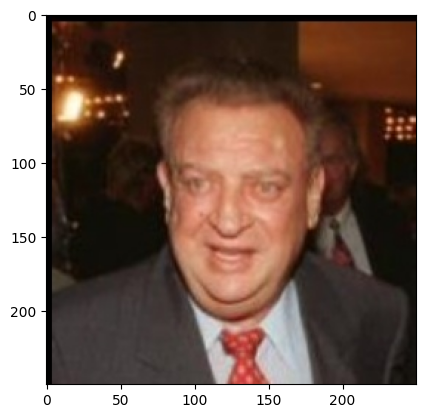

In [ ]:
plt.imshow(example[0])

In [ ]:
model = Autoencoder(128)
encoder = model.encoder
decoder = model.decoder

model.to("cuda")



Autoencoder(
  (linear_decoder): Linear(in_features=128, out_features=8192, bias=True)
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [ ]:
summary(decoder, input_size=(32, 128, 128))

RuntimeError: Given transposed=1, weight of size [64, 32, 3, 3], expected input[2, 32, 128, 128] to have 64 channels, but got 32 channels instead

In [ ]:
summary(model, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
       BatchNorm2d-5           [-1, 64, 64, 64]             128
              ReLU-6           [-1, 64, 64, 64]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
           Conv2d-10          [-1, 256, 16, 16]         295,168
      BatchNorm2d-11          [-1, 256, 16, 16]             512
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13           [-1, 32, 16, 16]          73,760
      BatchNorm2d-14           [-1, 32,

In [ ]:
from torch.utils.data import DataLoader
dataloader = DataLoader(fd,batch_size = 32,shuffle=False)

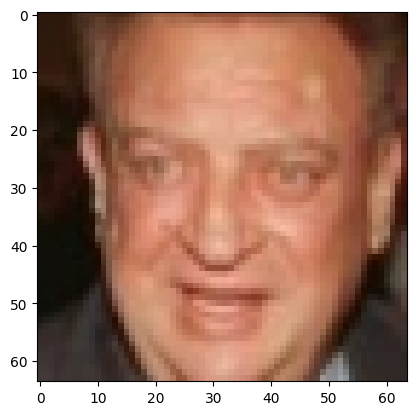

In [ ]:
for data in dataloader:
  plt.imshow(data['image'][0])
  break

In [ ]:
example.shape

(1, 3, 250, 250)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(df.path.values,df.name.values, test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp, test_size=0.5,random_state = 42)

In [ ]:
len(X_train)

9001

tensor([[[0.7138, 0.7177, 0.6549],
         [0.7102, 0.7142, 0.6516],
         [0.7265, 0.7303, 0.6757],
         ...,
         [0.8473, 0.8316, 0.7258],
         [0.8509, 0.8275, 0.7255],
         [0.8510, 0.8275, 0.7255]],

        [[0.7217, 0.7256, 0.6629],
         [0.7185, 0.7224, 0.6598],
         [0.7390, 0.7428, 0.6882],
         ...,
         [0.8436, 0.8279, 0.7220],
         [0.8508, 0.8275, 0.7252],
         [0.8510, 0.8275, 0.7253]],

        [[0.7297, 0.7337, 0.6709],
         [0.7344, 0.7384, 0.6758],
         [0.7629, 0.7667, 0.7121],
         ...,
         [0.8436, 0.8276, 0.7219],
         [0.8508, 0.8313, 0.7177],
         [0.8510, 0.8314, 0.7176]],

        ...,

        [[0.2084, 0.2358, 0.2084],
         [0.1767, 0.2041, 0.1765],
         [0.1451, 0.1723, 0.1447],
         ...,
         [0.2354, 0.2315, 0.1534],
         [0.2354, 0.2315, 0.1531],
         [0.2275, 0.2236, 0.1452]],

        [[0.1388, 0.1739, 0.1541],
         [0.1224, 0.1575, 0.1377],
         [0.

In [48]:
model = Autoencoder(64).to("cuda")

In [49]:
train_loader  = create_dataloader(X_train,y_train,batch_size=32)
val_loader  = create_dataloader(X_val,y_val,batch_size=32)
test_loader  = create_dataloader(X_test,y_test,batch_size=32)



In [ ]:
test_loader

In [50]:
loss_fn = nn.MSELoss()

In [51]:

epochs = 40
device = "cuda"
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.to(device)

Autoencoder(
  (linear_decoder): Linear(in_features=64, out_features=8192, bias=True)
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [ ]:
example = torch.tensor(example)
example = example.view(-1,3,128,128)

<ipython-input-188-8bfe3b9f5bd2>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  example = torch.tensor(example)


In [52]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt


def plot_loss(log_dict,epochs):
  loss_train = log_dict['training_loss_per_epoch']
  loss_val = log_dict['validation_loss_per_epoch']



  epochs = range(1, len(loss_train) + 1)

  # Creiamo il grafico
  plt.plot(epochs, loss_train, label='Training Loss', color='blue', linestyle='-', marker='o')
  plt.plot(epochs, loss_val, label='Validation Loss', color='red', linestyle='-', marker='o')

  # Aggiungiamo titolo e etichette
  plt.title("Loss durante il Training e la Validazione", fontsize=14)
  plt.xlabel("Epoche", fontsize=12)
  plt.ylabel("Loss", fontsize=12)

  # Mostriamo la legenda
  plt.legend()

  # Mostriamo il grafico
  plt.grid(True)
  plt.show()


def predict(model, test_loader, device):
    model.eval()
    reconstructed_images = []
    original_images = []

    for test_images in tqdm(test_loader):
        with torch.no_grad():
            # Prendi le immagini dal batch e spostale sulla GPU (se necessario)
            rec_images = test_images['image'].to(device)

            # Ottieni le immagini ricostruite dal modello
            output = model(rec_images)

            # Converti le immagini nel formato desiderato (128, 128, 3)
            # Per ricostruite immagini
            output_np = output.detach().cpu().numpy()
            output_inverted = output_np.transpose(0, 2, 3, 1)  # Cambia da (batch_size, 3, 128, 128) a (batch_size, 128, 128, 3)

            # Per immagini originali
            rec_images_np = rec_images.detach().cpu().numpy()


            # Aggiungi i dati alle liste
            reconstructed_images.append(output_inverted)
            original_images.append(rec_images_np)

    # Concatenazione delle immagini per ottenere un array finale
    reconstructed_images = np.concatenate(reconstructed_images, axis=0)
    original_images = np.concatenate(original_images, axis=0)

    return original_images, reconstructed_images

def train(model,train_loader,val_loader,loss_fn,optimizer,epochs,device = 'cuda'):

  torch.manual_seed(42)
  random.seed(42)
  np.random.seed(42)

  log_dict = {'training_loss_per_batch':[],
              'validation_loss_per_batch':[],
              'training_loss_per_epoch':[],
              'validation_loss_per_epoch':[]}



  for epoch in range(epochs):


            avg_loss = 0.
            model.train()
            for data in tqdm(train_loader):
              #  zeroing gradients
              optimizer.zero_grad()
              #  sending images to device
              images = data['image']
              images = images.to(device)
              #  reconstructing images
              output = model(images)
              #  computing loss
              loss = loss_fn(output, images.view(-1, 3, 128, 128))
              #  calculating gradients
              loss.backward()
              #  optimizing weights
              optimizer.step()

              avg_loss += loss.item()

              log_dict['training_loss_per_batch'].append(loss.item())

            avg_loss = avg_loss/len(train_loader)

            log_dict['training_loss_per_epoch'].append(avg_loss)
            print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, epochs, avg_loss))


            #--------------
            # VALIDATION
            #--------------

            avg_loss_val = 0.
            model.eval()
            for val_images in tqdm(val_loader):
              with torch.no_grad():
                #  sending validation images to device
                val_images = val_images['image'].to(device)
                #  reconstructing images
                output = model(val_images)
                #  computing validation loss
                val_loss = loss_fn(output, val_images.view(-1, 3, 128, 128))
                avg_loss_val += val_loss.item()

              #--------------
              # LOGGING
              #--------------
              log_dict['validation_loss_per_batch'].append(val_loss.item())
            log_dict['validation_loss_per_epoch'].append(avg_loss_val/len(test_loader))
            print('epoch [{}/{}], val_loss:{:.4f}'.format(epoch + 1, epochs, avg_loss_val/len(val_loader)))
  return log_dict

In [ ]:
#64
log_dict = train(model,train_loader,val_loader,loss_fn,optimizer,epochs,device = 'cuda')

100%|██████████| 282/282 [01:16<00:00,  3.70it/s]


epoch [1/40], loss:0.0300


100%|██████████| 36/36 [00:07<00:00,  4.69it/s]


epoch [1/40], val_loss:0.0185


100%|██████████| 282/282 [01:16<00:00,  3.68it/s]


epoch [2/40], loss:0.0160


100%|██████████| 36/36 [00:07<00:00,  4.69it/s]


epoch [2/40], val_loss:0.0134


100%|██████████| 282/282 [01:17<00:00,  3.65it/s]


epoch [3/40], loss:0.0122


100%|██████████| 36/36 [00:07<00:00,  4.51it/s]


epoch [3/40], val_loss:0.0109


100%|██████████| 282/282 [01:21<00:00,  3.48it/s]


epoch [4/40], loss:0.0106


100%|██████████| 36/36 [00:07<00:00,  4.54it/s]


epoch [4/40], val_loss:0.0097


100%|██████████| 282/282 [01:16<00:00,  3.70it/s]


epoch [5/40], loss:0.0096


100%|██████████| 36/36 [00:07<00:00,  4.61it/s]


epoch [5/40], val_loss:0.0089


100%|██████████| 282/282 [01:15<00:00,  3.71it/s]


epoch [6/40], loss:0.0086


100%|██████████| 36/36 [00:07<00:00,  4.60it/s]


epoch [6/40], val_loss:0.0085


100%|██████████| 282/282 [01:17<00:00,  3.66it/s]


epoch [7/40], loss:0.0082


100%|██████████| 36/36 [00:07<00:00,  4.68it/s]


epoch [7/40], val_loss:0.0077


100%|██████████| 282/282 [01:16<00:00,  3.69it/s]


epoch [8/40], loss:0.0080


100%|██████████| 36/36 [00:07<00:00,  4.52it/s]


epoch [8/40], val_loss:0.0078


100%|██████████| 282/282 [01:17<00:00,  3.63it/s]


epoch [9/40], loss:0.0079


100%|██████████| 36/36 [00:07<00:00,  4.66it/s]


epoch [9/40], val_loss:0.0078


100%|██████████| 282/282 [01:16<00:00,  3.68it/s]


epoch [10/40], loss:0.0078


100%|██████████| 36/36 [00:07<00:00,  4.84it/s]


epoch [10/40], val_loss:0.0075


100%|██████████| 282/282 [01:14<00:00,  3.76it/s]


epoch [11/40], loss:0.0076


100%|██████████| 36/36 [00:07<00:00,  4.86it/s]


epoch [11/40], val_loss:0.0079


100%|██████████| 282/282 [01:15<00:00,  3.72it/s]


epoch [12/40], loss:0.0075


100%|██████████| 36/36 [00:07<00:00,  4.76it/s]


epoch [12/40], val_loss:0.0074


100%|██████████| 282/282 [01:16<00:00,  3.70it/s]


epoch [13/40], loss:0.0073


100%|██████████| 36/36 [00:07<00:00,  4.65it/s]


epoch [13/40], val_loss:0.0072


100%|██████████| 282/282 [01:17<00:00,  3.65it/s]


epoch [14/40], loss:0.0073


100%|██████████| 36/36 [00:07<00:00,  4.70it/s]


epoch [14/40], val_loss:0.0076


100%|██████████| 282/282 [01:16<00:00,  3.68it/s]


epoch [15/40], loss:0.0072


100%|██████████| 36/36 [00:07<00:00,  4.57it/s]


epoch [15/40], val_loss:0.0074


 14%|█▍        | 39/282 [00:10<01:04,  3.75it/s]

In [ ]:
plot_loss(log_dict,epochs)

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/autoencoder/models/model_64.pth")

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/autoencoder/test_images/Brad_Pitt2.jpg')

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/autoencoder/test_images/paul_walker.jpg')

In [ ]:
def preprocessing_image(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  img = cv2.resize(img,(128,128))
  return img

In [ ]:
import os
from sklearn.metrics.pairwise import cosine_similarity
def encoder_input(img):
   img = torch.tensor(img)
   img = img.view(-1, 3, 128, 128).to("cuda")
   return img

def compute_similaty_by_test(test_folder_path,encoder):
  encoder.eval()
  file_names = []
  for file_name in os.listdir(test_folder_path):
    file_names.append(file_name)

  sim_map = {}
  for x in file_names:
    for y in file_names:

      if x != y:
        img1 = cv2.imread(test_folder_path+"/"+x)
        img1 = preprocessing_image(img1)
        img1 = torch.tensor(img1)
        img1 = img1.view(-1, 3, 128, 128).to("cuda")
        embedding1 = encoder(img1)
        embedding1 = embedding1.detach().cpu().numpy()

        img2 = cv2.imread(test_folder_path+"/"+y)
        img2 = preprocessing_image(img2)
        img2 = torch.tensor(img2)
        img2 = img2.view(-1, 3, 128, 128).to("cuda")
        embedding2 = encoder(img2)
        embedding2 = embedding2.detach().cpu().numpy()

        sim = cosine_similarity(embedding1,embedding2)[0]
        if x not in sim_map:
          sim_map[x] = []
          sim_map[x].append((y,sim))
        else:
          sim_map[x].append((y,sim))


    # Ordina i risultati in base alla similarità decrescente
    for key in sim_map:
        sim_map[key].sort(key=lambda pair: pair[1], reverse=True)

  return sim_map





In [ ]:
sim_map = compute_similaty_by_test("/content/drive/MyDrive/autoencoder/test_images",model.encoder)

In [ ]:
sim_map

{'saddam.png': [('margot_robbie2.jpg', array([0.31637424], dtype=float32)),
  ('jennifer_lawrence.jpg', array([0.29088324], dtype=float32)),
  ('escobar.jpg', array([0.2846079], dtype=float32)),
  ('vin_diesel.jpg', array([0.2828952], dtype=float32)),
  ('the_rock.jpg', array([0.22959448], dtype=float32)),
  ('leo2.jpg', array([0.21383768], dtype=float32)),
  ('Brad_Pitt2.jpg', array([0.1850429], dtype=float32)),
  ('katy_perry.png', array([0.15944606], dtype=float32)),
  ('paul_walker.jpg', array([0.15462641], dtype=float32)),
  ('margot_robbie.jpg', array([0.14688714], dtype=float32)),
  ('paul_walker2.jpg', array([0.14181668], dtype=float32)),
  ('vin_diesel2.jpg', array([0.12184016], dtype=float32)),
  ('katy_perry2.jpg', array([0.11551186], dtype=float32)),
  ('the_rock2.jpg', array([0.07555027], dtype=float32)),
  ('binladen_2.jpg', array([-0.0207286], dtype=float32)),
  ('jennifer_lawrence2.jpg', array([-0.06490177], dtype=float32)),
  ('leo.jpg', array([-0.08927622], dtype=floa

In [ ]:
sim_map

{'jennifer_lawrence2.jpg': [('paul_walker2.jpg',
   array([0.4087978], dtype=float32)),
  ('leo.jpg', array([0.40871423], dtype=float32)),
  ('vin_diesel2.jpg', array([0.37443596], dtype=float32)),
  ('katy_perry.png', array([0.36126423], dtype=float32)),
  ('Brad_Pitt.JPG', array([0.35281774], dtype=float32)),
  ('paul_walker.jpg', array([0.29436424], dtype=float32)),
  ('Brad_Pitt2.jpg', array([0.2827266], dtype=float32)),
  ('saddam-hussein2.jpg', array([0.2736677], dtype=float32)),
  ('leo2.jpg', array([0.2408345], dtype=float32)),
  ('the_rock.jpg', array([0.16854398], dtype=float32)),
  ('escobar.jpg', array([0.16331385], dtype=float32)),
  ('binladen_2.jpg', array([0.14758995], dtype=float32)),
  ('ben_laden.jpg', array([0.12029123], dtype=float32)),
  ('katy_perry2.jpg', array([0.02931059], dtype=float32)),
  ('margot_robbie2.jpg', array([0.01484761], dtype=float32)),
  ('jennifer_lawrence.jpg', array([-0.02346249], dtype=float32)),
  ('saddam.png', array([-0.05446426], dtype=f

In [ ]:
sim_map['the_rock.jpg']

[('the_rock2.jpg', array([0.44219166], dtype=float32)),
 ('vin_diesel2.jpg', array([0.35966444], dtype=float32)),
 ('binladen_2.jpg', array([0.34218585], dtype=float32)),
 ('ben_laden.jpg', array([0.2819717], dtype=float32)),
 ('saddam.png', array([0.22959448], dtype=float32)),
 ('vin_diesel.jpg', array([0.21698198], dtype=float32)),
 ('paul_walker.jpg', array([0.15482956], dtype=float32)),
 ('paul_walker2.jpg', array([0.14937808], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([0.12793761], dtype=float32)),
 ('margot_robbie.jpg', array([0.11082967], dtype=float32)),
 ('leo.jpg', array([0.08813626], dtype=float32)),
 ('leo2.jpg', array([0.04489814], dtype=float32)),
 ('jennifer_lawrence.jpg', array([0.02146119], dtype=float32)),
 ('Brad_Pitt2.jpg', array([-0.0257386], dtype=float32)),
 ('margot_robbie2.jpg', array([-0.0367701], dtype=float32)),
 ('katy_perry.png', array([-0.03721046], dtype=float32)),
 ('katy_perry2.jpg', array([-0.05922662], dtype=float32)),
 ('Brad_Pitt.JPG', arr

In [ ]:
sim_map['paul_walker.jpg']

[('Brad_Pitt2.jpg', array([0.65324295], dtype=float32)),
 ('leo2.jpg', array([0.54095465], dtype=float32)),
 ('paul_walker2.jpg', array([0.52441895], dtype=float32)),
 ('Brad_Pitt.JPG', array([0.5119329], dtype=float32)),
 ('leo.jpg', array([0.41049322], dtype=float32)),
 ('katy_perry2.jpg', array([0.31155467], dtype=float32)),
 ('katy_perry.png', array([0.27226913], dtype=float32)),
 ('escobar.jpg', array([0.25880387], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([0.23245308], dtype=float32)),
 ('the_rock.jpg', array([0.15482956], dtype=float32)),
 ('saddam.png', array([0.15462641], dtype=float32)),
 ('margot_robbie2.jpg', array([0.14323105], dtype=float32)),
 ('vin_diesel2.jpg', array([0.14165309], dtype=float32)),
 ('saddam-hussein2.jpg', array([0.13620979], dtype=float32)),
 ('margot_robbie.jpg', array([0.0628722], dtype=float32)),
 ('vin_diesel.jpg', array([-0.02844203], dtype=float32)),
 ('binladen_2.jpg', array([-0.03834475], dtype=float32)),
 ('the_rock2.jpg', array([-0.1

In [ ]:
sim_map['margot_robbie.jpg']

[('margot_robbie2.jpg', array([0.49485284], dtype=float32)),
 ('the_rock2.jpg', array([0.4159531], dtype=float32)),
 ('jennifer_lawrence.jpg', array([0.34867376], dtype=float32)),
 ('paul_walker2.jpg', array([0.30443484], dtype=float32)),
 ('leo.jpg', array([0.29336977], dtype=float32)),
 ('katy_perry.png', array([0.28595957], dtype=float32)),
 ('vin_diesel.jpg', array([0.2620553], dtype=float32)),
 ('katy_perry2.jpg', array([0.14861394], dtype=float32)),
 ('saddam.png', array([0.14688714], dtype=float32)),
 ('escobar.jpg', array([0.12091235], dtype=float32)),
 ('the_rock.jpg', array([0.11082967], dtype=float32)),
 ('vin_diesel2.jpg', array([0.10267495], dtype=float32)),
 ('Brad_Pitt2.jpg', array([0.0849594], dtype=float32)),
 ('paul_walker.jpg', array([0.0628722], dtype=float32)),
 ('binladen_2.jpg', array([0.00420098], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([0.00039938], dtype=float32)),
 ('Brad_Pitt.JPG', array([-0.01333375], dtype=float32)),
 ('ben_laden.jpg', array([-0

In [ ]:
sim_map['Brad_Pitt.JPG']

[('leo2.jpg', array([0.5561647], dtype=float32)),
 ('paul_walker.jpg', array([0.5510981], dtype=float32)),
 ('Brad_Pitt2.jpg', array([0.516574], dtype=float32)),
 ('leo.jpg', array([0.5159998], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([0.35281774], dtype=float32)),
 ('saddam-hussein2.jpg', array([0.3440508], dtype=float32)),
 ('paul_walker2.jpg', array([0.31927618], dtype=float32)),
 ('katy_perry2.jpg', array([0.20113415], dtype=float32)),
 ('katy_perry.png', array([0.16502583], dtype=float32)),
 ('escobar.jpg', array([0.15365542], dtype=float32)),
 ('vin_diesel2.jpg', array([0.14191288], dtype=float32)),
 ('margot_robbie2.jpg', array([0.04998314], dtype=float32)),
 ('ben_laden.jpg', array([0.04474834], dtype=float32)),
 ('the_rock.jpg', array([0.00519826], dtype=float32)),
 ('margot_robbie.jpg', array([-0.01317543], dtype=float32)),
 ('saddam.png', array([-0.11633876], dtype=float32)),
 ('jennifer_lawrence.jpg', array([-0.11887532], dtype=float32)),
 ('binladen_2.jpg', array

In [ ]:
sim_map['katy_perry.png']

[('escobar.jpg', array([0.6750343], dtype=float32)),
 ('Brad_Pitt2.jpg', array([0.5416815], dtype=float32)),
 ('paul_walker2.jpg', array([0.51305723], dtype=float32)),
 ('leo.jpg', array([0.48851046], dtype=float32)),
 ('jennifer_lawrence.jpg', array([0.45973516], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([0.41309494], dtype=float32)),
 ('vin_diesel2.jpg', array([0.40297782], dtype=float32)),
 ('katy_perry2.jpg', array([0.3436862], dtype=float32)),
 ('leo2.jpg', array([0.31697008], dtype=float32)),
 ('margot_robbie.jpg', array([0.28595957], dtype=float32)),
 ('vin_diesel.jpg', array([0.28370136], dtype=float32)),
 ('paul_walker.jpg', array([0.27226913], dtype=float32)),
 ('saddam.png', array([0.15944606], dtype=float32)),
 ('Brad_Pitt.JPG', array([0.13947111], dtype=float32)),
 ('margot_robbie2.jpg', array([0.07725187], dtype=float32)),
 ('saddam-hussein2.jpg', array([0.02853063], dtype=float32)),
 ('the_rock.jpg', array([-0.03721046], dtype=float32)),
 ('ben_laden.jpg', array

In [ ]:
sim_map['saddam.png']

[('margot_robbie2.jpg', array([0.31637424], dtype=float32)),
 ('jennifer_lawrence.jpg', array([0.29088324], dtype=float32)),
 ('escobar.jpg', array([0.2846079], dtype=float32)),
 ('vin_diesel.jpg', array([0.2828952], dtype=float32)),
 ('the_rock.jpg', array([0.22959448], dtype=float32)),
 ('leo2.jpg', array([0.21383768], dtype=float32)),
 ('Brad_Pitt2.jpg', array([0.1850429], dtype=float32)),
 ('katy_perry.png', array([0.15944606], dtype=float32)),
 ('paul_walker.jpg', array([0.15462641], dtype=float32)),
 ('margot_robbie.jpg', array([0.14688714], dtype=float32)),
 ('paul_walker2.jpg', array([0.14181668], dtype=float32)),
 ('vin_diesel2.jpg', array([0.12184016], dtype=float32)),
 ('katy_perry2.jpg', array([0.11551186], dtype=float32)),
 ('the_rock2.jpg', array([0.07555027], dtype=float32)),
 ('binladen_2.jpg', array([-0.0207286], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([-0.06490177], dtype=float32)),
 ('leo.jpg', array([-0.08927622], dtype=float32)),
 ('ben_laden.jpg', array

In [ ]:
sim_map['paul_walker.jpg']

[('Brad_Pitt2.jpg', array([0.65157443], dtype=float32)),
 ('Brad_Pitt.JPG', array([0.5510981], dtype=float32)),
 ('paul_walker2.jpg', array([0.5490988], dtype=float32)),
 ('leo2.jpg', array([0.4974205], dtype=float32)),
 ('leo.jpg', array([0.40493065], dtype=float32)),
 ('katy_perry.png', array([0.29949588], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([0.29436424], dtype=float32)),
 ('katy_perry2.jpg', array([0.25479263], dtype=float32)),
 ('escobar.jpg', array([0.25247326], dtype=float32)),
 ('vin_diesel2.jpg', array([0.23995577], dtype=float32)),
 ('saddam-hussein2.jpg', array([0.23714115], dtype=float32)),
 ('saddam.png', array([0.20239007], dtype=float32)),
 ('margot_robbie2.jpg', array([0.13994986], dtype=float32)),
 ('the_rock.jpg', array([0.12827873], dtype=float32)),
 ('margot_robbie.jpg', array([0.05965918], dtype=float32)),
 ('binladen_2.jpg', array([0.03687747], dtype=float32)),
 ('vin_diesel.jpg', array([-0.04723983], dtype=float32)),
 ('ben_laden.jpg', array([-0.148

In [ ]:
sim_map['vin_diesel.jpg']

[('jennifer_lawrence.jpg', array([0.42312148], dtype=float32)),
 ('the_rock2.jpg', array([0.41355813], dtype=float32)),
 ('vin_diesel2.jpg', array([0.34247053], dtype=float32)),
 ('katy_perry.png', array([0.28370136], dtype=float32)),
 ('saddam.png', array([0.2828952], dtype=float32)),
 ('margot_robbie.jpg', array([0.2620553], dtype=float32)),
 ('the_rock.jpg', array([0.21698198], dtype=float32)),
 ('leo2.jpg', array([0.17698762], dtype=float32)),
 ('escobar.jpg', array([0.15355241], dtype=float32)),
 ('leo.jpg', array([0.13105546], dtype=float32)),
 ('Brad_Pitt2.jpg', array([0.10380219], dtype=float32)),
 ('margot_robbie2.jpg', array([0.05458585], dtype=float32)),
 ('katy_perry2.jpg', array([0.03155388], dtype=float32)),
 ('binladen_2.jpg', array([-0.02515503], dtype=float32)),
 ('paul_walker.jpg', array([-0.02844203], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([-0.03342093], dtype=float32)),
 ('paul_walker2.jpg', array([-0.05146601], dtype=float32)),
 ('ben_laden.jpg', array(

In [ ]:
sim_map['margot_robbie.jpg']

[('margot_robbie2.jpg', array([0.43090641], dtype=float32)),
 ('the_rock2.jpg', array([0.3850153], dtype=float32)),
 ('jennifer_lawrence.jpg', array([0.3184594], dtype=float32)),
 ('leo.jpg', array([0.24905549], dtype=float32)),
 ('paul_walker2.jpg', array([0.23306346], dtype=float32)),
 ('katy_perry.png', array([0.23081154], dtype=float32)),
 ('vin_diesel.jpg', array([0.21717277], dtype=float32)),
 ('katy_perry2.jpg', array([0.1118665], dtype=float32)),
 ('escobar.jpg', array([0.10927781], dtype=float32)),
 ('saddam.png', array([0.10775277], dtype=float32)),
 ('Brad_Pitt2.jpg', array([0.10610119], dtype=float32)),
 ('the_rock.jpg', array([0.09409507], dtype=float32)),
 ('paul_walker.jpg', array([0.05965918], dtype=float32)),
 ('vin_diesel2.jpg', array([0.03710428], dtype=float32)),
 ('Brad_Pitt.JPG', array([-0.01317543], dtype=float32)),
 ('ben_laden.jpg', array([-0.0556863], dtype=float32)),
 ('binladen_2.jpg', array([-0.0587296], dtype=float32)),
 ('jennifer_lawrence2.jpg', array([-

In [ ]:
original_images,reconstructed_images =predict(model,test_loader,'cuda')


In [31]:
original_images[0].shape

(128, 128, 3)

In [32]:
reconstructed_images[0].shape

(128, 128, 3)

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Originale
    axes[0, i].imshow(original_images[i])
    axes[0, i].axis('off')
    axes[0, i].set_title("Originale")

    # Ricostruzione
    axes[1, i].imshow(reconstructed_images[i])
    axes[1, i].axis('off')
    axes[1, i].set_title("Ricostruito")

plt.tight_layout()
plt.show()